# Similing Face Detector using Deep Learning
-----

## Loading the data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import random

In [24]:
#Dataset source: https://kaggle.com/iarunava/happy-house-dataset

training_filename = 'D:\\Projects\\Python Practice For Begineer to Pro\\happy-house-dataset\\train_happy.h5'
testing_filename = 'D:\\Projects\\Python Practice For Begineer to Pro\\happy-house-dataset\\test_happy.h5'

In [3]:
train = h5py.File(training_filename,'r')
test = h5py.File(testing_filename)

In [4]:
for i in test.keys():
    print(i)

list_classes
test_set_x
test_set_y


In [5]:
x_train = np.array(train['train_set_x'][:]) 
y_train = np.array(train['train_set_y'][:])

x_test = np.array(test['test_set_x'][:])
y_test = np.array(test['test_set_y'][:])

In [6]:
x_train.shape

(600, 64, 64, 3)

## Data Exploration and Visualization

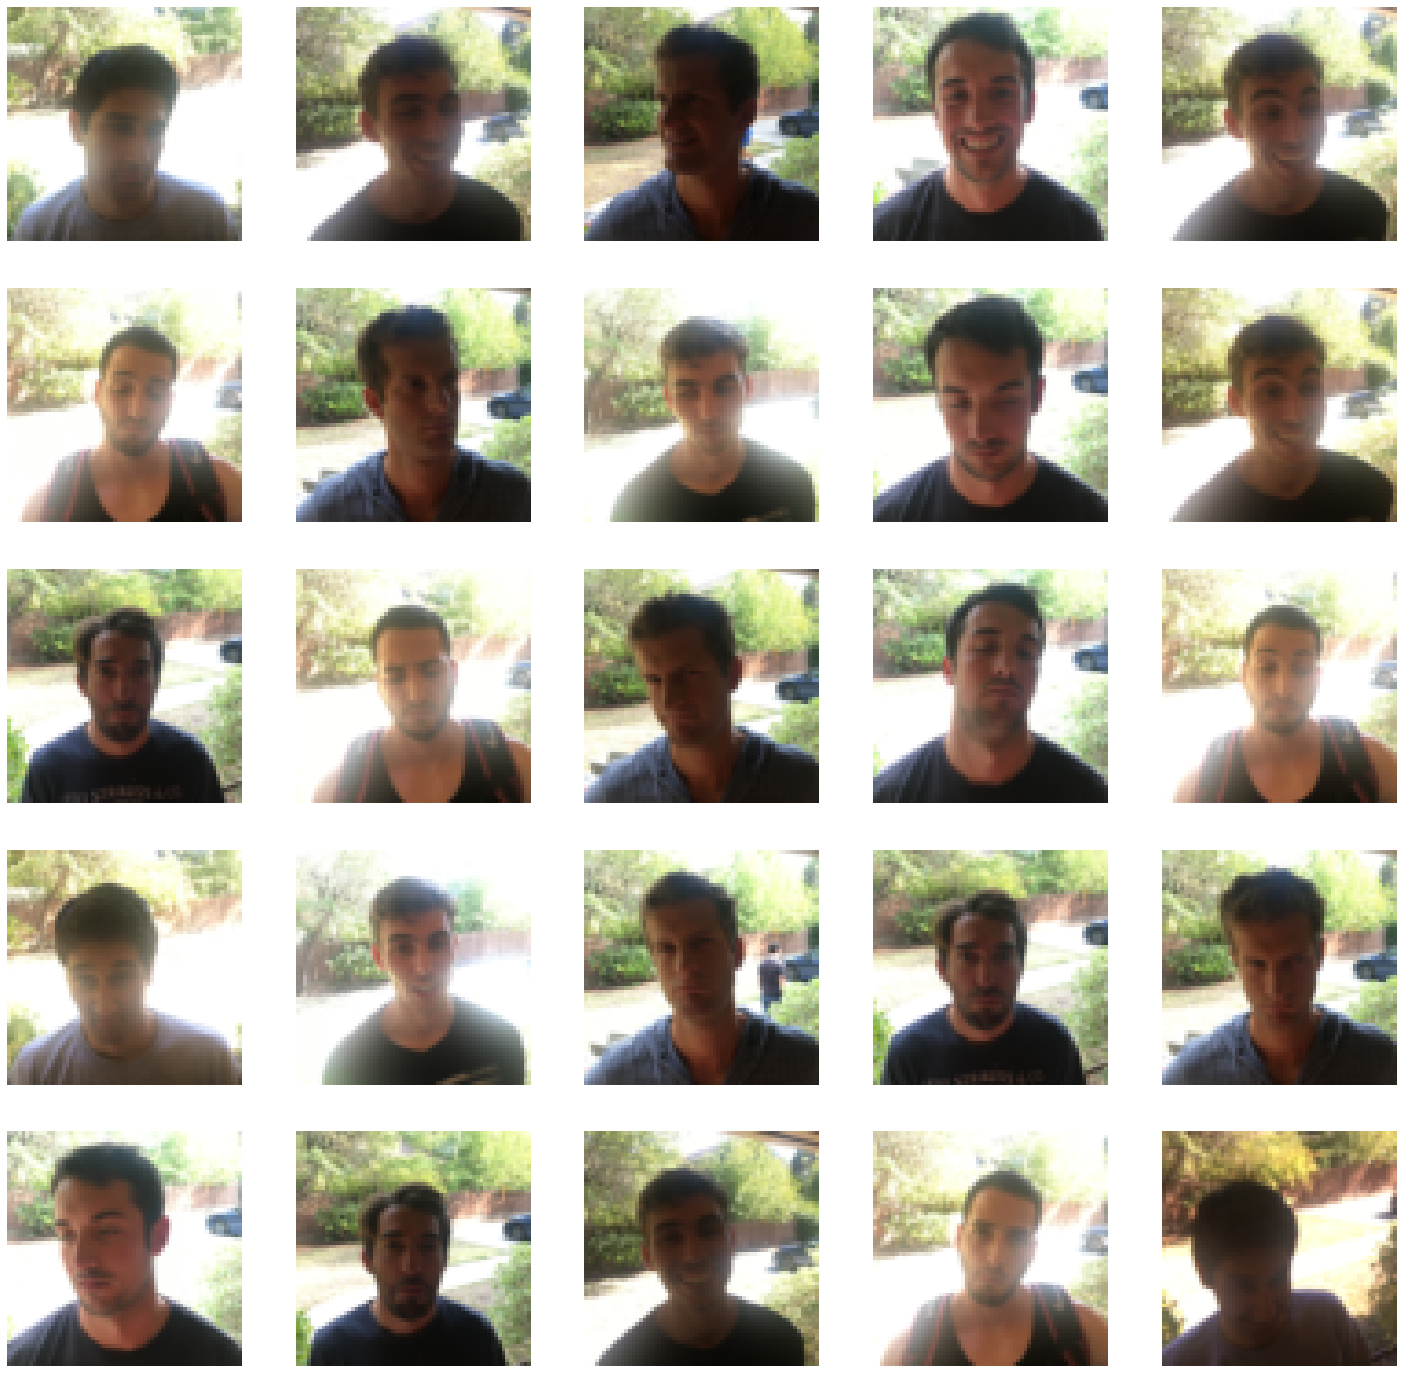

In [7]:
w_grid = 5
l_grid = 5

fig,axes = plt.subplots(l_grid,w_grid,figsize=(25,25))
axe = axes.ravel()
for i in np.arange(0,l_grid*w_grid):
    no = np.random.randint(0,600)
    axe[i].imshow(x_train[no])
    axe[i].axis('off')

In [25]:
## Normalizing the data.
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train.shape

(600, 64, 64, 3)

## Model Building

In [10]:
from keras.models import Sequential
from keras.layers import Flatten,Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [11]:
model = Sequential()
model.add(Conv2D(64,6,6,input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,6,6,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(output_dim=128 ,activation='relu'))
model.add(Dense(output_dim=1 ,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 59, 59, 64)        6976      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        147520    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
__________

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
#Training the dataset
model.fit(x_train,y_train,epochs=25,batch_size=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
600/600 [==============================] - 16s 27ms/step - loss: 0.8218 - acc: 0.5450
Epoch 2/25
600/600 [==============================] - 13s 22ms/step - loss: 0.6825 - acc: 0.5617
Epoch 3/25
600/600 [==============================] - 13s 22ms/step - loss: 0.5943 - acc: 0.7300
Epoch 4/25
600/600 [==============================] - 13s 21ms/step - loss: 0.4832 - acc: 0.7667
Epoch 5/25
600/600 [==============================] - 14s 24ms/step - loss: 0.3937 - acc: 0.8133
Epoch 6/25
600/600 [==============================] - 14s 23ms/step - loss: 0.3191 - acc: 0.8700
Epoch 7/25
600/600 [==============================] - 14s 23ms/step - loss: 0.2797 - acc: 0.8933
Epoch 8/25
600/600 [==============================] - 14s 24ms/step - loss: 0.2308 - acc: 0.9117
Epoch 9/25
600/600 [==============================] - 14s 24ms/step - loss: 0.1923 - acc: 0.9317
Epoch 10/25
600/600 [==============================] - 14s 24ms/step - loss: 0.

In [16]:
#Evaluating the model
accuracy = model.evaluate(x_test,y_test)

150/150 [==============================] - 1s 8ms/step


In [17]:
#Displaying accuracy 
print('Accuracy: ',accuracy[1])

Accuracy:  0.9333333349227906


In [18]:
predicted_class = model.predict_classes(x_test)

In [19]:
predicted_class.shape

(150, 1)

## Visualizing the predicted result

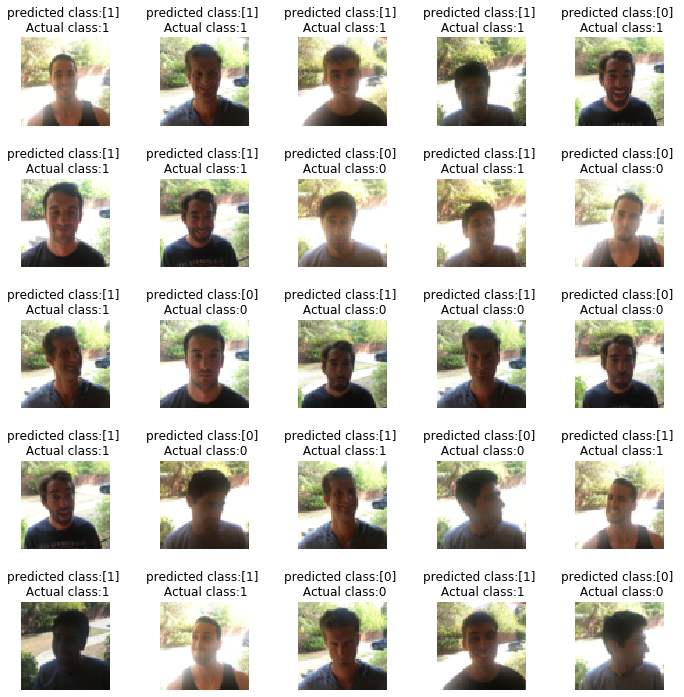

In [20]:
w_grid = 5
l_grid = 5

fig,axes = plt.subplots(l_grid,w_grid,figsize=(12,12))
axe = axes.ravel()
for i in np.arange(0,l_grid*w_grid):
    axe[i].imshow(x_test[i])
    axe[i].set_title('predicted class:{} \n Actual class:{}'.format(predicted_class[i],y_test[i]))
    axe[i].axis('off')
plt.subplots_adjust(hspace=0.6)

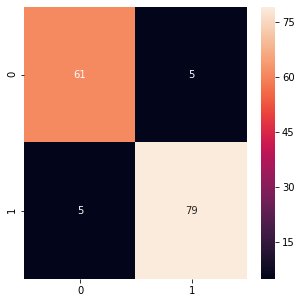

In [21]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,predicted_class)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)

In [26]:
#Displaying Classification report
print(classification_report(y_test,predicted_class))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        66
           1       0.94      0.94      0.94        84

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150

